In [128]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# Dataset Preparation

'Building_energy_index', 'Building_bag_residence_object_id', 'Building_usable_floor_area_thermal_zone', 'Building_energy_requirement',
                      'Building_primary_fossil_energy', 'Building_primary_fossil_energy_EMG_standard', 'Building_share_renewable_energy', 
                      'Building_temperature_exceedance', 'Building_heat_demand', 'Building_energy_index_with_EMG_standard'

In [129]:
DATA_PATH = 'data/out/dataset_v202441617541'
data = pd.read_csv(DATA_PATH)
data

,Unnamed: 0,Building_bag_building_id,Building_type,Building_subtype,Building_postcode_num,Building_energy_class,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,id,year,volume,floors,roof_type,greenhouse,geographicalExtent
0,0,3.631000e+14,NaN,NaN,1011,C,112.11,0.0,220.06,132.74,1735.09,NL.IMBAG.Pand.0363100012181958,1948.0,6891.854004,NaN,multiple horizontal,False,"[122184.046875, 487858.3125, 1.467000007629394..."
1,1,3.631000e+14,Appartement,Tussenmidden,1011,A++,44.16,54.0,55.98,73.75,145.08,NL.IMBAG.Pand.0363100012181959,1916.0,2149.765625,NaN,slanted,False,"[122198.2265625, 487857.5, 1.3890000581741333,..."
2,2,3.631000e+14,Appartement,Tussenmidden,1011,A++,46.42,55.4,56.83,78.20,145.08,NL.IMBAG.Pand.0363100012181959,1916.0,2149.765625,NaN,slanted,False,"[122198.2265625, 487857.5, 1.3890000581741333,..."
3,3,3.631000e+14,Appartement,Tussenmidden,1011,A++,47.03,54.8,56.88,77.05,145.08,NL.IMBAG.Pand.0363100012181959,1916.0,2149.765625,NaN,slanted,False,"[122198.2265625, 487857.5, 1.3890000581741333,..."
4,4,3.631000e+14,Appartement,Tussendak,1011,A+++,68.95,81.0,28.53,110.55,292.63,NL.IMBAG.Pand.0363100012181959,1916.0,2149.765625,NaN,slanted,False,"[122198.2265625, 487857.5, 1.3890000581741333,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104502,104502,3.841000e+14,Appartement,Tussendak,1112,A,90.01,24.6,72.11,116.73,122.14,NL.IMBAG.Pand.0384100000011622,2021.0,55637.558594,NaN,multiple horizontal,False,"[125828.09375, 482246.75, -2.979997396469116, ..."
104503,104503,3.841000e+14,Appartement,Hoekmidden,1112,A+,61.17,26.3,53.90,78.92,117.90,NL.IMBAG.Pand.0384100000011622,2021.0,55637.558594,NaN,multiple horizontal,False,"[125828.09375, 482246.75, -2.979997396469116, ..."
104504,104504,3.841000e+14,Appartement,Hoekdak,1112,A,105.15,23.8,85.46,128.50,118.20,NL.IMBAG.Pand.0384100000011622,2021.0,55637.558594,NaN,multiple horizontal,False,"[125828.09375, 482246.75, -2.979997396469116, ..."
104505,104505,3.841000e+14,Appartement,Tussenmidden,1112,A+,60.11,0.0,69.90,61.55,59.00,NL.IMBAG.Pand.0384100000011455,2020.0,44805.992188,NaN,multiple horizontal,False,"[125947.5234375, 482448.3125, -1.7599999904632..."


### Removing outliers

In [130]:
data = data[data['Building_heat_demand'] < 1000]
data = data[data['Building_primary_fossil_energy'] < 1e4]
data = data[data['volume'] > 0]
data = data.dropna(subset=['Building_type'])
data

,Unnamed: 0,Building_bag_building_id,Building_type,Building_subtype,Building_postcode_num,Building_energy_class,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,id,year,volume,floors,roof_type,greenhouse,geographicalExtent
1,1,3.631000e+14,Appartement,Tussenmidden,1011,A++,44.16,54.0,55.98,73.75,145.08,NL.IMBAG.Pand.0363100012181959,1916.0,2149.765625,NaN,slanted,False,"[122198.2265625, 487857.5, 1.3890000581741333,..."
2,2,3.631000e+14,Appartement,Tussenmidden,1011,A++,46.42,55.4,56.83,78.20,145.08,NL.IMBAG.Pand.0363100012181959,1916.0,2149.765625,NaN,slanted,False,"[122198.2265625, 487857.5, 1.3890000581741333,..."
3,3,3.631000e+14,Appartement,Tussenmidden,1011,A++,47.03,54.8,56.88,77.05,145.08,NL.IMBAG.Pand.0363100012181959,1916.0,2149.765625,NaN,slanted,False,"[122198.2265625, 487857.5, 1.3890000581741333,..."
4,4,3.631000e+14,Appartement,Tussendak,1011,A+++,68.95,81.0,28.53,110.55,292.63,NL.IMBAG.Pand.0363100012181959,1916.0,2149.765625,NaN,slanted,False,"[122198.2265625, 487857.5, 1.3890000581741333,..."
7,7,3.631000e+14,Appartement,Tussenmidden,1011,E,225.00,0.0,316.75,231.23,63.37,NL.IMBAG.Pand.0363100012171918,1600.0,458.810638,5.0,slanted,False,"[122015.3984375, 487643.28125, 2.5009999275207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104502,104502,3.841000e+14,Appartement,Tussendak,1112,A,90.01,24.6,72.11,116.73,122.14,NL.IMBAG.Pand.0384100000011622,2021.0,55637.558594,NaN,multiple horizontal,False,"[125828.09375, 482246.75, -2.979997396469116, ..."
104503,104503,3.841000e+14,Appartement,Hoekmidden,1112,A+,61.17,26.3,53.90,78.92,117.90,NL.IMBAG.Pand.0384100000011622,2021.0,55637.558594,NaN,multiple horizontal,False,"[125828.09375, 482246.75, -2.979997396469116, ..."
104504,104504,3.841000e+14,Appartement,Hoekdak,1112,A,105.15,23.8,85.46,128.50,118.20,NL.IMBAG.Pand.0384100000011622,2021.0,55637.558594,NaN,multiple horizontal,False,"[125828.09375, 482246.75, -2.979997396469116, ..."
104505,104505,3.841000e+14,Appartement,Tussenmidden,1112,A+,60.11,0.0,69.90,61.55,59.00,NL.IMBAG.Pand.0384100000011455,2020.0,44805.992188,NaN,multiple horizontal,False,"[125947.5234375, 482448.3125, -1.7599999904632..."


In [131]:
building_types = data.groupby('Building_type')[['Building_heat_demand',
       'Building_share_renewable_energy', 'Building_primary_fossil_energy',
       'Building_energy_requirement',
       'Building_usable_floor_area_thermal_zone', 'volume', 'year']].describe()
building_types

Building_heat_demand              \
                                                           count        mean   
Building_type                                                                  
Appartement                                              75022.0  119.955910   
Logieswoning                                                31.0  108.183548   
Rijwoning hoek                                            2024.0  149.761151   
Rijwoning tussen                                          6113.0  118.464243   
Twee-onder-één-kap                                         270.0  170.695889   
Vrijstaande woning                                         239.0  170.905649   
Woongebouw met niet-zelfstandige woonruimte                378.0  117.305450   

                                                                         \
                                                   std    min       25%   
Building_type                                                             
Appartement                                  64.299684   7.00   73.2025   
Logieswoning                                  6.062804  99.33  106.0150   
Rijwoning hoek                               59.857962  34.47  106.0000   
Rijwoning tussen                             45.623046  26.00   88.3500   
Twee-onder-één-kap                           66.190764  58.54  109.2775   
Vrijstaande woning                           82.833400  39.03  102.6200   
Woongebouw met niet-zelfstandige woonruimte  52.440375  58.00   76.0000   

                                                                      \
                                                 50%     75%     max   
Building_type                                                          
Appartement                                  106.200  155.00  838.00   
Logieswoning                                 106.400  113.11  120.14   
Rijwoning hoek                               128.310  182.70  408.00   
Rijwoning tussen                             103.000  143.00  583.00   
Twee-onder-één-kap                           162.485  231.89  384.33   
Vrijstaande woning                           156.990  208.48  505.00   
Woongebouw met niet-zelfstandige woonruimte  110.530  138.00  486.00   

                                            Building_share_renewable_energy  \
                                                                      count   
Building_type                                                                 
Appartement                                                         75022.0   
Logieswoning                                                           31.0   
Rijwoning hoek                                                       2024.0   
Rijwoning tussen                                                     6113.0   
Twee-onder-één-kap                                                    270.0   
Vrijstaande woning                                                    239.0   
Woongebouw met niet-zelfstandige woonruimte                           378.0   

                                                        ...        volume  \
                                                  mean  ...           75%   
Building_type                                           ...                 
Appartement                                  11.832524  ...  17530.597656   
Logieswoning                                 20.322581  ...    444.888626   
Rijwoning hoek                                6.495603  ...    437.257195   
Rijwoning tussen                              9.011042  ...    426.550323   
Twee-onder-één-kap                            6.190370  ...    576.661362   
Vrijstaande woning                           12.874895  ...    934.141724   
Woongebouw met niet-zelfstandige woonruimte   0.523280  ...   9972.349609   

                                                               year  \
                                                       max    count   
Building_type                                                      

In [132]:
df = data.dropna()

In [133]:
energy_label_num = {'A+++++': 1, 'A++++': 2, 'A+++': 3, 'A++': 4, 'A+': 5, 'A': 6, 'B': 7, 'C': 8, 'D': 9, 'E': 10, 'F': 11, 'G': 12}

In [134]:
#Create new label numerical column to make average label
df['energy_label_num'] = df['Building_energy_class'].apply(lambda label: energy_label_num[label])

/var/folders/tt/59b1f78918g9z5zhcmxxssqm0000gn/T/ipykernel_93662/1141454066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_label_num'] = df['Building_energy_class'].apply(lambda label: energy_label_num[label])


In [135]:
df = df.groupby('Building_bag_building_id').agg({
    'Building_bag_building_id': 'max',
    'energy_label_num': 'mean',  
    'Building_heat_demand': 'mean',
    'Building_share_renewable_energy': 'max',
    'Building_primary_fossil_energy': 'mean',
    'Building_energy_requirement': 'mean',
    'volume': 'mean',
    'year': 'mean',
    'volume': 'mean',
    'Building_usable_floor_area_thermal_zone': 'mean',
    'geographicalExtent': 'first'
})[['Building_bag_building_id','energy_label_num', 'Building_heat_demand', 'Building_share_renewable_energy', 'Building_primary_fossil_energy', 
   'Building_energy_requirement', 'Building_usable_floor_area_thermal_zone', 'year', 'volume', 'geographicalExtent']]
df

,Building_bag_building_id,energy_label_num,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,year,volume,geographicalExtent
Building_bag_building_id,,,,,,,,,,
3.631000e+14,3.631000e+14,9.750000,217.637500,0.000000,297.252500,212.870000,73.842500,1956.0,1234.743042,"[118594.78125, 485656.71875, 0.537000000476837..."
3.631000e+14,3.631000e+14,8.500000,163.830000,0.000000,230.815000,151.625000,79.325000,1923.0,621.632812,"[121578.9375, 484494.25, 0.44999998807907104, ..."
3.631000e+14,3.631000e+14,6.000000,83.320000,71.650000,39.590000,85.865000,110.520000,1998.0,817.388794,"[113561.2421875, 484893.53125, -2.628000020980..."
3.631000e+14,3.631000e+14,8.000000,169.750000,0.000000,247.270000,169.010000,95.870000,1931.0,1129.644897,"[118461.7109375, 485004.21875, 0.3400000035762..."
3.631000e+14,3.631000e+14,12.000000,286.000000,0.000000,385.990000,284.390000,55.500000,1928.0,975.639648,"[118372.265625, 484806.78125, 0.45600000023841..."
...,...,...,...,...,...,...,...,...,...,...
3.841000e+14,3.841000e+14,5.500000,86.940000,21.700000,119.250000,88.385000,72.800000,1990.0,447.679077,"[126760.3359375, 484903.1875, -0.7810000181198..."
3.841000e+14,3.841000e+14,6.000000,96.590000,22.250000,128.125000,99.890000,72.800000,1990.0,532.435669,"[126765.0703125, 484904.5, -0.9390000104904175..."
3.841000e+14,3.841000e+14,5.500000,62.745000,14.200000,95.790000,69.355000,88.440000,2017.0,5978.157227,"[126954.3046875, 483367.78125, -1.072999954223..."


In [136]:
#Convert the energy_label_num back to categorical value
num_to_energy_label = {v: k for k, v in energy_label_num.items()}
num_to_energy_label

{1: 'A+++++',
 2: 'A++++',
 3: 'A+++',
 4: 'A++',
 5: 'A+',
 6: 'A',
 7: 'B',
 8: 'C',
 9: 'D',
 10: 'E',
 11: 'F',
 12: 'G'}

In [137]:
df['energy_label'] = df['energy_label_num'].apply(lambda label: num_to_energy_label[round(label)])
df

,Building_bag_building_id,energy_label_num,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,year,volume,geographicalExtent,energy_label
Building_bag_building_id,,,,,,,,,,,
3.631000e+14,3.631000e+14,9.750000,217.637500,0.000000,297.252500,212.870000,73.842500,1956.0,1234.743042,"[118594.78125, 485656.71875, 0.537000000476837...",E
3.631000e+14,3.631000e+14,8.500000,163.830000,0.000000,230.815000,151.625000,79.325000,1923.0,621.632812,"[121578.9375, 484494.25, 0.44999998807907104, ...",C
3.631000e+14,3.631000e+14,6.000000,83.320000,71.650000,39.590000,85.865000,110.520000,1998.0,817.388794,"[113561.2421875, 484893.53125, -2.628000020980...",A
3.631000e+14,3.631000e+14,8.000000,169.750000,0.000000,247.270000,169.010000,95.870000,1931.0,1129.644897,"[118461.7109375, 485004.21875, 0.3400000035762...",C
3.631000e+14,3.631000e+14,12.000000,286.000000,0.000000,385.990000,284.390000,55.500000,1928.0,975.639648,"[118372.265625, 484806.78125, 0.45600000023841...",G
...,...,...,...,...,...,...,...,...,...,...,...
3.841000e+14,3.841000e+14,5.500000,86.940000,21.700000,119.250000,88.385000,72.800000,1990.0,447.679077,"[126760.3359375, 484903.1875, -0.7810000181198...",A
3.841000e+14,3.841000e+14,6.000000,96.590000,22.250000,128.125000,99.890000,72.800000,1990.0,532.435669,"[126765.0703125, 484904.5, -0.9390000104904175...",A
3.841000e+14,3.841000e+14,5.500000,62.745000,14.200000,95.790000,69.355000,88.440000,2017.0,5978.157227,"[126954.3046875, 483367.78125, -1.072999954223...",A


# Kmean

In [138]:
df.dtypes

Building_bag_building_id                   float64
energy_label_num                           float64
Building_heat_demand                       float64
Building_share_renewable_energy            float64
Building_primary_fossil_energy             float64
Building_energy_requirement                float64
Building_usable_floor_area_thermal_zone    float64
year                                       float64
volume                                     float64
geographicalExtent                          object
energy_label                                object
dtype: object

In [139]:
df.columns

Index(['Building_bag_building_id', 'energy_label_num', 'Building_heat_demand',
       'Building_share_renewable_energy', 'Building_primary_fossil_energy',
       'Building_energy_requirement',
       'Building_usable_floor_area_thermal_zone', 'year', 'volume',
       'geographicalExtent', 'energy_label'],
      dtype='object')

In [140]:
# Define numerical and categorical features
numerical_features = ['Building_heat_demand', 'Building_primary_fossil_energy',
       'Building_energy_requirement',
       'Building_usable_floor_area_thermal_zone', 'volume', 'year'] #'Building_share_renewable_energy'
categorical_features = ['energy_label']
# Convert categorical columns to category dtype
for col in categorical_features:
    df[col] = df[col].astype('category')

In [141]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
#categorical_transformer = OneHotEncoder()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Apply preprocessing
df_processed = preprocessor.fit_transform(df)

# Convert processed data to a DataFrame (Optional, for PCA and visualization)
df_processed = pd.DataFrame(df_processed)
df_processed

,0,1,2,3,4,5,6
0,1.175977,0.696219,1.241976,0.063266,-0.233418,0.635449,E
1,0.240692,0.001691,0.088722,0.242153,-0.444758,-0.070612,C
2,-1.158737,-1.997348,-1.149549,1.260006,-0.377281,1.534071,A
3,0.343594,0.173709,0.416085,0.781995,-0.269646,0.100554,C
4,2.364258,1.623869,2.58871,-0.535226,-0.322731,0.036367,G
...,...,...,...,...,...,...,...
21225,-1.095814,-1.164593,-1.102097,0.029251,-0.50472,1.362905,A
21226,-0.928078,-1.071815,-0.885456,0.029251,-0.475504,1.362905,A
21227,-1.516373,-1.409841,-1.460436,0.539564,1.401638,1.940591,A
21228,-1.680137,-1.914297,-1.383464,-0.036386,10.086364,2.026174,A+++


In [142]:
df_processed.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [143]:

# Dimensionality Reduction with PCA (Optional)
# pca = PCA(n_components=2)
# df_reduced = pca.fit_transform(df_processed)


'''costs = []
K = range(1, 10)

for k in K:
    print(f'#Cluster: {k}')
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=1, verbose=1, random_state=42)
    kproto.fit_predict(df_processed, categorical=[7])
    costs.append(kproto.cost_)

plt.figure(figsize=(8, 5))
plt.plot(K, costs, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()'''


"costs = []\nK = range(1, 10)\n\nfor k in K:\n    print(f'#Cluster: {k}')\n    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=1, verbose=1, random_state=42)\n    kproto.fit_predict(df_processed, categorical=[7])\n    costs.append(kproto.cost_)\n\nplt.figure(figsize=(8, 5))\nplt.plot(K, costs, 'bx-')\nplt.xlabel('Number of clusters (k)')\nplt.ylabel('Cost')\nplt.title('Elbow Method For Optimal k')\nplt.show()"

## Assign Clusters

In [148]:
from kmodes.kprototypes import KPrototypes

# Assuming df_processed is your preprocessed DataFrame and the optimal number of clusters is 3
optimal_k = 4  # Replace with the optimal number of clusters you've determined from the elbow method

# Create an instance of KPrototypes with the optimal number of clusters
kproto = KPrototypes(n_clusters=optimal_k, init='Cao', n_init=1, verbose=1, random_state=42)

# Fit the model and predict the clusters
# Make sure to specify the correct indices for categorical features in your dataset
cluster_assignment = kproto.fit_predict(df_processed, categorical=[6])


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4720, ncost: 77528.54556983658
Run: 1, iteration: 2/100, moves: 1900, ncost: 76281.98113458343
Run: 1, iteration: 3/100, moves: 1610, ncost: 75337.25349470749
Run: 1, iteration: 4/100, moves: 1230, ncost: 74862.22962058873
Run: 1, iteration: 5/100, moves: 853, ncost: 74621.27510331092
Run: 1, iteration: 6/100, moves: 703, ncost: 74456.25904512496
Run: 1, iteration: 7/100, moves: 713, ncost: 74271.84608850813
Run: 1, iteration: 8/100, moves: 749, ncost: 74081.19124921474
Run: 1, iteration: 9/100, moves: 723, ncost: 73921.6831954296
Run: 1, iteration: 10/100, moves: 610, ncost: 73812.48168536852
Run: 1, iteration: 11/100, moves: 465, ncost: 73752.71509500139
Run: 1, iteration: 12/100, moves: 301, ncost: 73728.09693891223
Run: 1, iteration: 13/100, moves: 167, ncost: 73721.32684470862
Run: 1, iteration:

In [149]:
# Assign the cluster labels to your original DataFrame
df['Cluster'] = cluster_assignment
df

,Building_bag_building_id,energy_label_num,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,year,volume,geographicalExtent,energy_label,Cluster,coordinates,latitude,longitude
Building_bag_building_id,,,,,,,,,,,,,,,
3.631000e+14,3.631000e+14,9.750000,217.637500,0.000000,297.252500,212.870000,73.842500,1956.0,1234.743042,"[118594.78125, 485656.71875, 0.537000000476837...",E,0,"(4.852800978413946, 52.35759961551032)",52.357600,4.852801
3.631000e+14,3.631000e+14,8.500000,163.830000,0.000000,230.815000,151.625000,79.325000,1923.0,621.632812,"[121578.9375, 484494.25, 0.44999998807907104, ...",C,1,"(4.896720178613905, 52.34734176852595)",52.347342,4.896720
3.631000e+14,3.631000e+14,6.000000,83.320000,71.650000,39.590000,85.865000,110.520000,1998.0,817.388794,"[113561.2421875, 484893.53125, -2.628000020980...",A,2,"(4.779009883443999, 52.3503840852818)",52.350384,4.779010
3.631000e+14,3.631000e+14,8.000000,169.750000,0.000000,247.270000,169.010000,95.870000,1931.0,1129.644897,"[118461.7109375, 485004.21875, 0.3400000035762...",C,1,"(4.850918549844552, 52.35172658409516)",52.351727,4.850919
3.631000e+14,3.631000e+14,12.000000,286.000000,0.000000,385.990000,284.390000,55.500000,1928.0,975.639648,"[118372.265625, 484806.78125, 0.45600000023841...",G,0,"(4.8496272762217965, 52.349946202652646)",52.349946,4.849627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.841000e+14,3.841000e+14,5.500000,86.940000,21.700000,119.250000,88.385000,72.800000,1990.0,447.679077,"[126760.3359375, 484903.1875, -0.7810000181198...",A,2,"(4.9727254475034375, 52.35130773499551)",52.351308,4.972725
3.841000e+14,3.841000e+14,6.000000,96.590000,22.250000,128.125000,99.890000,72.800000,1990.0,532.435669,"[126765.0703125, 484904.5, -0.9390000104904175...",A,2,"(4.972794822933009, 52.35131977424991)",52.351320,4.972795
3.841000e+14,3.841000e+14,5.500000,62.745000,14.200000,95.790000,69.355000,88.440000,2017.0,5978.157227,"[126954.3046875, 483367.78125, -1.072999954223...",A,2,"(4.9757002151088265, 52.3375183199416)",52.337518,4.975700


## Modify coordinates

In [150]:
import ast
from pyproj import Transformer

# Define a transformer from EPSG:7415 to EPSG:4326 (WGS84)
transformer = Transformer.from_crs("epsg:7415", "epsg:4326", always_xy=True)

df['coordinates'] = df['geographicalExtent'].apply(lambda lat_long: transformer.transform(ast.literal_eval(lat_long)[0], ast.literal_eval(lat_long)[1]))
df['latitude'] = df['coordinates'].apply(lambda coord: coord[1])
df['longitude'] = df['coordinates'].apply(lambda coord: coord[0])
df['longitude']

Building_bag_building_id
3.631000e+14    4.852801
3.631000e+14    4.896720
3.631000e+14    4.779010
3.631000e+14    4.850919
3.631000e+14    4.849627
                  ...   
3.841000e+14    4.972725
3.841000e+14    4.972795
3.841000e+14    4.975700
3.841000e+14    4.970079
3.841000e+14    4.967564
Name: longitude, Length: 21230, dtype: float64

In [151]:
df['coordinates'].iloc[0][0]

4.852800978413946

## Visualisation

In [152]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [153]:
# Load the shapefile
#amsterdam_shp = gpd.read_file("data/amsterdam_shape/amsterdam.shp")

# Plot the shapefile
'''amsterdam_shp.plot()
plt.title("Map of Amsterdam")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()'''

'amsterdam_shp.plot()\nplt.title("Map of Amsterdam")\nplt.xlabel("Longitude")\nplt.ylabel("Latitude")\nplt.show()'

In [154]:
# Create a map centered around Amsterdam
'''m = folium.Map(location=[52.3676, 4.9041], zoom_start=12)

# Add the shapefile to the map
folium.GeoJson(
    amsterdam_shp,
    name='Amsterdam'
).add_to(m)

# Add a layer control panel to the map
folium.LayerControl().add_to(m)
m'''

"m = folium.Map(location=[52.3676, 4.9041], zoom_start=12)\n\n# Add the shapefile to the map\nfolium.GeoJson(\n    amsterdam_shp,\n    name='Amsterdam'\n).add_to(m)\n\n# Add a layer control panel to the map\nfolium.LayerControl().add_to(m)\nm"

In [155]:
# Create a map centered around Amsterdam
'''amsterdam_center = [52.3676, 4.9041]
map_amsterdam = folium.Map(location=amsterdam_center, zoom_start=13)
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue']

# Add markers to the map, color-coded by cluster
for i,row in df.iterrows():
    folium.Marker(
        location=[row.coordinates[1], row.coordinates[0]],
        popup=f'Building Cluster {row.Cluster}',  # Display cluster info in popup
        icon=folium.Icon(color=cluster_colors[row.Cluster])
    ).add_to(map_amsterdam)

# Display the map
map_amsterdam'''

"amsterdam_center = [52.3676, 4.9041]\nmap_amsterdam = folium.Map(location=amsterdam_center, zoom_start=13)\ncluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue']\n\n# Add markers to the map, color-coded by cluster\nfor i,row in df.iterrows():\n    folium.Marker(\n        location=[row.coordinates[1], row.coordinates[0]],\n        popup=f'Building Cluster {row.Cluster}',  # Display cluster info in popup\n        icon=folium.Icon(color=cluster_colors[row.Cluster])\n    ).add_to(map_amsterdam)\n\n# Display the map\nmap_amsterdam"

/var/folders/tt/59b1f78918g9z5zhcmxxssqm0000gn/T/ipykernel_93662/3530903262.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


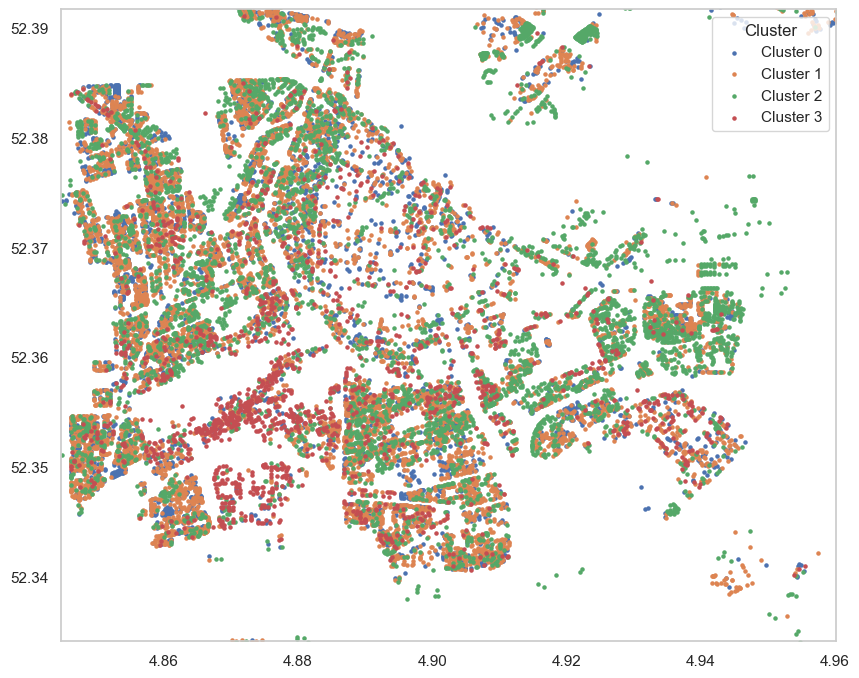

In [156]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"  # Coordinate Reference System: WGS84
)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='white', edgecolor='black')
# Focus on Amsterdam area
amsterdam_bounds = {
    'x_min': 4.85,  # min longitude
    'x_max': 4.95,  # max longitude
    'y_min': 52.35,  # min latitude
    'y_max': 52.40   # max latitude
}
#ax.set_xlim(amsterdam_bounds['x_min'], amsterdam_bounds['x_max'])
#ax.set_ylim(amsterdam_bounds['y_min'], amsterdam_bounds['y_max'])
ax.set_xlim(4.84472, 4.96028)
ax.set_ylim(52.33417, 52.39167)
# Plot each cluster with different color
for cluster, group in gdf.groupby('Cluster'):
    group.plot(ax=ax, marker='o', markersize=5, label=f'Cluster {cluster}')

plt.legend(title='Cluster')
plt.show()

In [157]:
df.columns

Index(['Building_bag_building_id', 'energy_label_num', 'Building_heat_demand',
       'Building_share_renewable_energy', 'Building_primary_fossil_energy',
       'Building_energy_requirement',
       'Building_usable_floor_area_thermal_zone', 'year', 'volume',
       'geographicalExtent', 'energy_label', 'Cluster', 'coordinates',
       'latitude', 'longitude'],
      dtype='object')

## Results Analysis

In [158]:
results = df.groupby('Cluster')[['energy_label_num', 'Building_heat_demand',
       'Building_share_renewable_energy', 'Building_primary_fossil_energy',
       'Building_energy_requirement',
       'Building_usable_floor_area_thermal_zone', 'year', 'volume',
       'latitude', 'longitude']].describe()
results

energy_label_num                                                    \
                   count       mean       std   min   25%        50%   75%   
Cluster                                                                      
0                 4177.0  10.490989  0.953374  4.00  10.0  10.000000  11.0   
1                 8731.0   8.260674  0.763152  3.25   8.0   8.000000   9.0   
2                 6672.0   6.454651  0.833629  2.00   6.0   6.333333   7.0   
3                 1650.0   7.667651  1.225642  3.00   7.0   8.000000   8.0   

              Building_heat_demand              ...   latitude             \
          max                count        mean  ...        75%        max   
Cluster                                         ...                         
0        12.0               4177.0  237.238071  ...  52.376796  52.419448   
1        12.0               8731.0  152.728657  ...  52.375516  52.419174   
2        11.5               6672.0   94.660371  ...  52.375422  52.422672   
3        12.0               1650.0  138.269325  ...  52.363994  52.414698   

        longitude                                                              \
            count      mean       std       min       25%       50%       75%   
Cluster                                                                         
0          4177.0  4.877136  0.031325  4.781051  4.855177  4.874866  4.897981   
1          8731.0  4.883147  0.031686  4.780850  4.859207  4.880871  4.904005   
2          6672.0  4.894884  0.044285  4.770899  4.865693  4.893460  4.925515   
3          1650.0  4.884350  0.023575  4.792211  4.869545  4.878156  4.897089   

                   
              max  
Cluster            
0        5.015549  
1        5.018560  
2        5.018567  
3        4.999043  

[4 rows x 80 columns]

In [159]:
df

,Building_bag_building_id,energy_label_num,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,year,volume,geographicalExtent,energy_label,Cluster,coordinates,latitude,longitude
Building_bag_building_id,,,,,,,,,,,,,,,
3.631000e+14,3.631000e+14,9.750000,217.637500,0.000000,297.252500,212.870000,73.842500,1956.0,1234.743042,"[118594.78125, 485656.71875, 0.537000000476837...",E,0,"(4.852800978413946, 52.35759961551032)",52.357600,4.852801
3.631000e+14,3.631000e+14,8.500000,163.830000,0.000000,230.815000,151.625000,79.325000,1923.0,621.632812,"[121578.9375, 484494.25, 0.44999998807907104, ...",C,1,"(4.896720178613905, 52.34734176852595)",52.347342,4.896720
3.631000e+14,3.631000e+14,6.000000,83.320000,71.650000,39.590000,85.865000,110.520000,1998.0,817.388794,"[113561.2421875, 484893.53125, -2.628000020980...",A,2,"(4.779009883443999, 52.3503840852818)",52.350384,4.779010
3.631000e+14,3.631000e+14,8.000000,169.750000,0.000000,247.270000,169.010000,95.870000,1931.0,1129.644897,"[118461.7109375, 485004.21875, 0.3400000035762...",C,1,"(4.850918549844552, 52.35172658409516)",52.351727,4.850919
3.631000e+14,3.631000e+14,12.000000,286.000000,0.000000,385.990000,284.390000,55.500000,1928.0,975.639648,"[118372.265625, 484806.78125, 0.45600000023841...",G,0,"(4.8496272762217965, 52.349946202652646)",52.349946,4.849627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.841000e+14,3.841000e+14,5.500000,86.940000,21.700000,119.250000,88.385000,72.800000,1990.0,447.679077,"[126760.3359375, 484903.1875, -0.7810000181198...",A,2,"(4.9727254475034375, 52.35130773499551)",52.351308,4.972725
3.841000e+14,3.841000e+14,6.000000,96.590000,22.250000,128.125000,99.890000,72.800000,1990.0,532.435669,"[126765.0703125, 484904.5, -0.9390000104904175...",A,2,"(4.972794822933009, 52.35131977424991)",52.351320,4.972795
3.841000e+14,3.841000e+14,5.500000,62.745000,14.200000,95.790000,69.355000,88.440000,2017.0,5978.157227,"[126954.3046875, 483367.78125, -1.072999954223...",A,2,"(4.9757002151088265, 52.3375183199416)",52.337518,4.975700


### Swarm Plots

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [161]:
df

,Building_bag_building_id,energy_label_num,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,year,volume,geographicalExtent,energy_label,Cluster,coordinates,latitude,longitude
Building_bag_building_id,,,,,,,,,,,,,,,
3.631000e+14,3.631000e+14,9.750000,217.637500,0.000000,297.252500,212.870000,73.842500,1956.0,1234.743042,"[118594.78125, 485656.71875, 0.537000000476837...",E,0,"(4.852800978413946, 52.35759961551032)",52.357600,4.852801
3.631000e+14,3.631000e+14,8.500000,163.830000,0.000000,230.815000,151.625000,79.325000,1923.0,621.632812,"[121578.9375, 484494.25, 0.44999998807907104, ...",C,1,"(4.896720178613905, 52.34734176852595)",52.347342,4.896720
3.631000e+14,3.631000e+14,6.000000,83.320000,71.650000,39.590000,85.865000,110.520000,1998.0,817.388794,"[113561.2421875, 484893.53125, -2.628000020980...",A,2,"(4.779009883443999, 52.3503840852818)",52.350384,4.779010
3.631000e+14,3.631000e+14,8.000000,169.750000,0.000000,247.270000,169.010000,95.870000,1931.0,1129.644897,"[118461.7109375, 485004.21875, 0.3400000035762...",C,1,"(4.850918549844552, 52.35172658409516)",52.351727,4.850919
3.631000e+14,3.631000e+14,12.000000,286.000000,0.000000,385.990000,284.390000,55.500000,1928.0,975.639648,"[118372.265625, 484806.78125, 0.45600000023841...",G,0,"(4.8496272762217965, 52.349946202652646)",52.349946,4.849627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.841000e+14,3.841000e+14,5.500000,86.940000,21.700000,119.250000,88.385000,72.800000,1990.0,447.679077,"[126760.3359375, 484903.1875, -0.7810000181198...",A,2,"(4.9727254475034375, 52.35130773499551)",52.351308,4.972725
3.841000e+14,3.841000e+14,6.000000,96.590000,22.250000,128.125000,99.890000,72.800000,1990.0,532.435669,"[126765.0703125, 484904.5, -0.9390000104904175...",A,2,"(4.972794822933009, 52.35131977424991)",52.351320,4.972795
3.841000e+14,3.841000e+14,5.500000,62.745000,14.200000,95.790000,69.355000,88.440000,2017.0,5978.157227,"[126954.3046875, 483367.78125, -1.072999954223...",A,2,"(4.9757002151088265, 52.3375183199416)",52.337518,4.975700


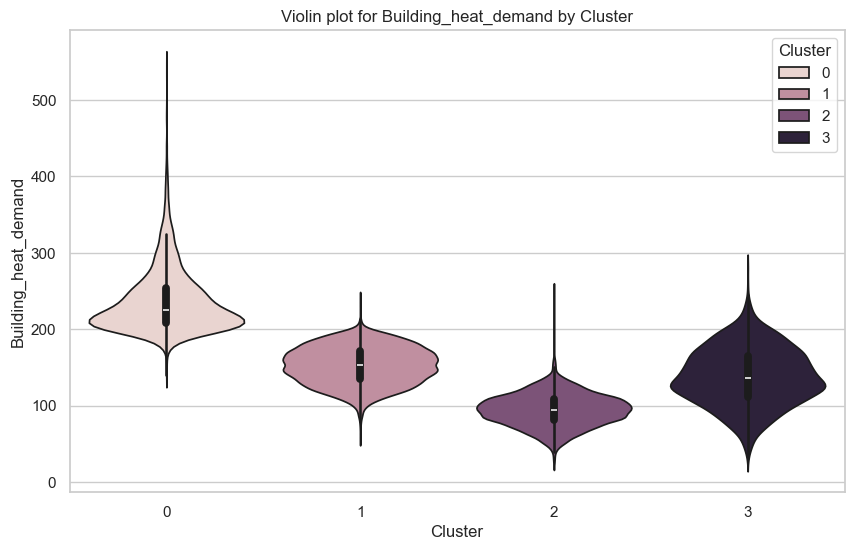

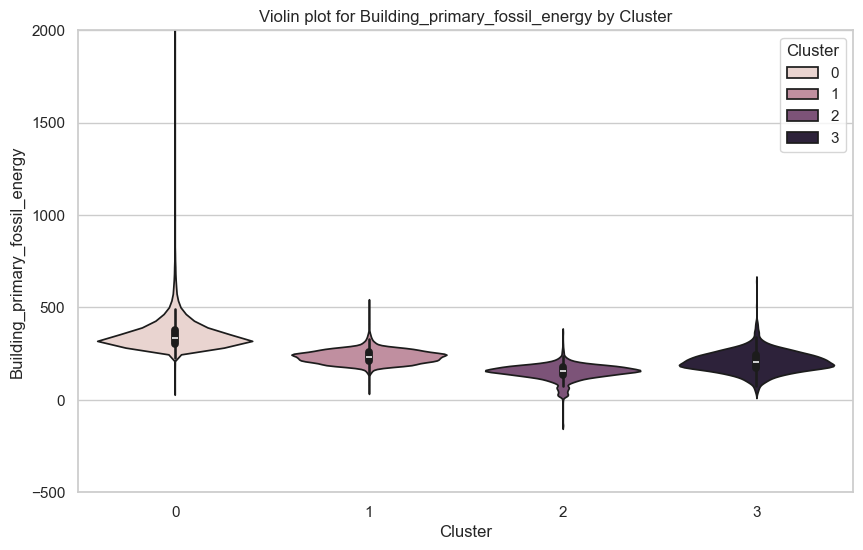

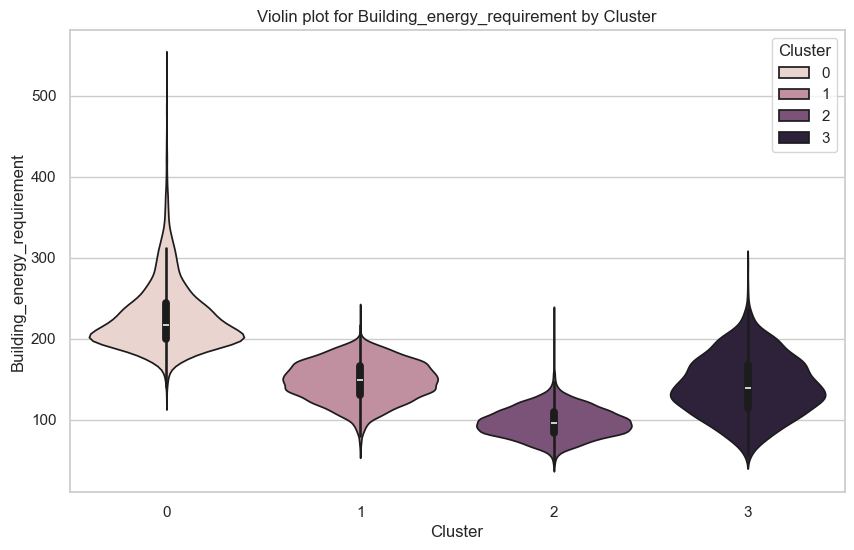

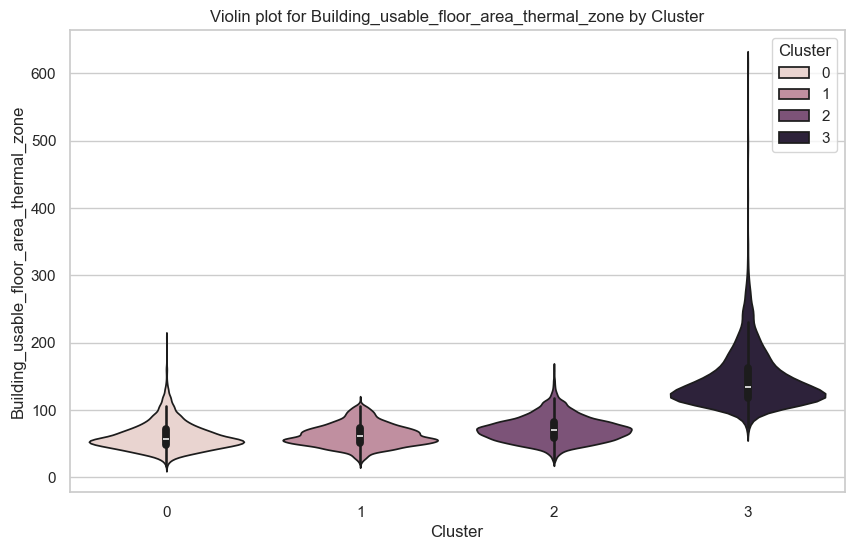

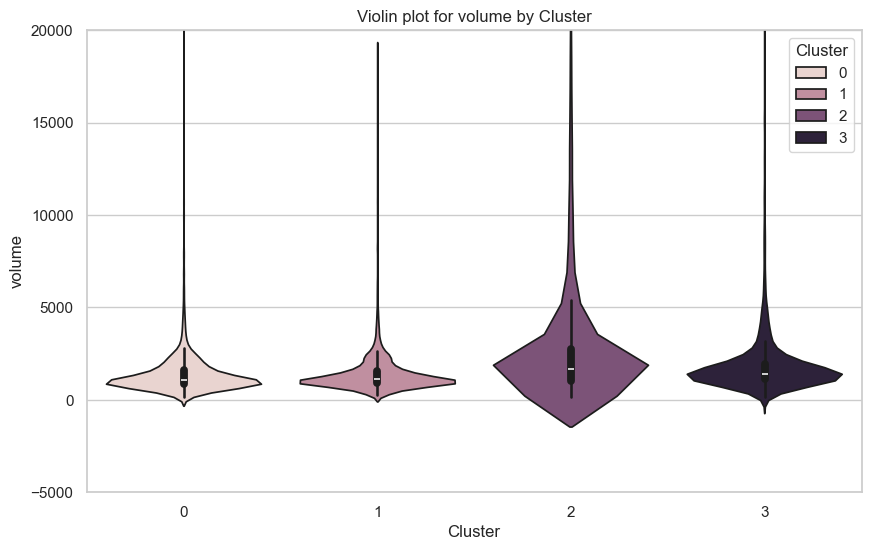

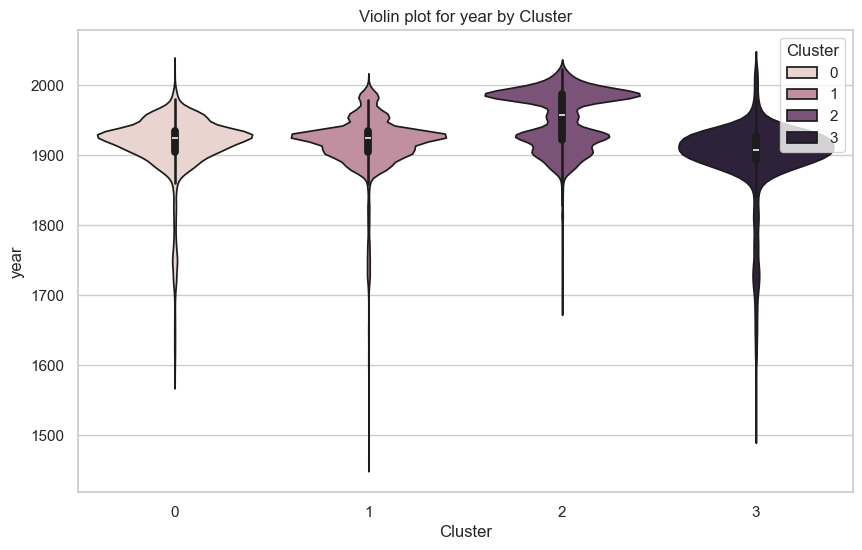

categorcal column


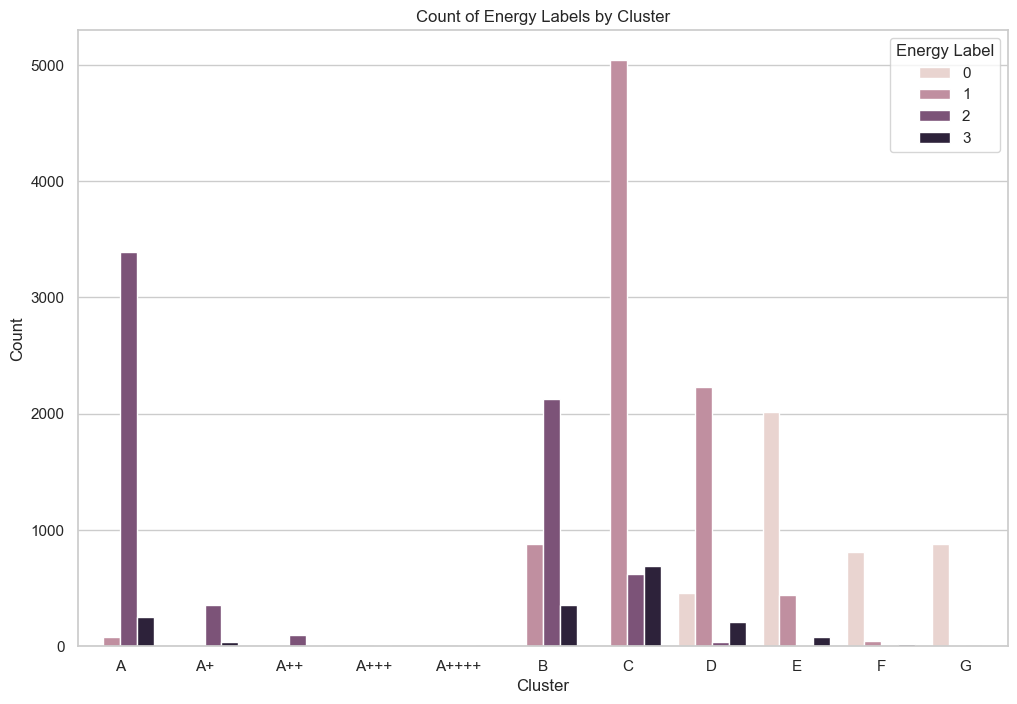

In [163]:

# Assuming you have loaded your DataFrame as `df`
sampled_df = df
# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Creating a list of numerical and categorical columns
numerical_columns = numerical_features
categorical_columns = categorical_features

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.violinplot(x='Cluster', y=column,hue='Cluster', data=sampled_df)
    plt.title(f'Violin plot for {column} by Cluster')
    if column == 'volume':
        ax.set_ylim(-5000, 20000)  # Change 1000 to your desired maximum y-value
    elif column == 'Building_primary_fossil_energy':
        ax.set_ylim(-500, 2000)  # Change 1000 to your desired maximum y-value
    plt.show()
# Plotting swarm plots for categorical data might not be directly insightful as swarm plots are typically used for numerical distributions.
# However, if you want to visualize the distribution of categorical data, you can use count plots instead.
for column in categorical_columns:
    print('categorcal column')
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, hue='Cluster', data=sampled_df)
    plt.title('Count of Energy Labels by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title='Energy Label')
    plt.show()


In [118]:
df

,Building_bag_building_id,energy_label_num,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,year,volume,geographicalExtent,energy_label,Cluster,coordinates,latitude,longitude
Building_bag_building_id,,,,,,,,,,,,,,,
3.631000e+14,3.631000e+14,9.750000,217.637500,0.000000,297.252500,212.870000,73.842500,1956.0,1234.743042,"[118594.78125, 485656.71875, 0.537000000476837...",E,3,"(4.852800978413946, 52.35759961551032)",52.357600,4.852801
3.631000e+14,3.631000e+14,8.500000,163.830000,0.000000,230.815000,151.625000,79.325000,1923.0,621.632812,"[121578.9375, 484494.25, 0.44999998807907104, ...",C,0,"(4.896720178613905, 52.34734176852595)",52.347342,4.896720
3.631000e+14,3.631000e+14,6.000000,83.320000,71.650000,39.590000,85.865000,110.520000,1998.0,817.388794,"[113561.2421875, 484893.53125, -2.628000020980...",A,1,"(4.779009883443999, 52.3503840852818)",52.350384,4.779010
3.631000e+14,3.631000e+14,8.000000,169.750000,0.000000,247.270000,169.010000,95.870000,1931.0,1129.644897,"[118461.7109375, 485004.21875, 0.3400000035762...",C,0,"(4.850918549844552, 52.35172658409516)",52.351727,4.850919
3.631000e+14,3.631000e+14,12.000000,286.000000,0.000000,385.990000,284.390000,55.500000,1928.0,975.639648,"[118372.265625, 484806.78125, 0.45600000023841...",G,3,"(4.8496272762217965, 52.349946202652646)",52.349946,4.849627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.841000e+14,3.841000e+14,5.500000,86.940000,21.700000,119.250000,88.385000,72.800000,1990.0,447.679077,"[126760.3359375, 484903.1875, -0.7810000181198...",A,1,"(4.9727254475034375, 52.35130773499551)",52.351308,4.972725
3.841000e+14,3.841000e+14,6.000000,96.590000,22.250000,128.125000,99.890000,72.800000,1990.0,532.435669,"[126765.0703125, 484904.5, -0.9390000104904175...",A,1,"(4.972794822933009, 52.35131977424991)",52.351320,4.972795
3.841000e+14,3.841000e+14,5.500000,62.745000,14.200000,95.790000,69.355000,88.440000,2017.0,5978.157227,"[126954.3046875, 483367.78125, -1.072999954223...",A,1,"(4.9757002151088265, 52.3375183199416)",52.337518,4.975700


In [119]:
data[data['Building_bag_building_id'] == 363100012239474]

,Unnamed: 0,Building_bag_building_id,Building_type,Building_subtype,Building_postcode_num,Building_energy_class,Building_heat_demand,Building_share_renewable_energy,Building_primary_fossil_energy,Building_energy_requirement,Building_usable_floor_area_thermal_zone,id,year,volume,floors,roof_type,greenhouse,geographicalExtent
26837,26837,3.631000e+14,Appartement,Tussenvloer,1034,A+,65.0,68.3,29.84,64.84,58.83,NL.IMBAG.Pand.0363100012239474,2013.0,162392.5,2.0,slanted,False,"[122851.7890625, 491189.59375, 0.0759999975562..."
